In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:\Users\eravrxx\Downloads\Coding\Python\python-Datasets\train (24).csv')

In [3]:
train.head()

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [5]:
train.shape

(210240, 16)

In [6]:
train.duplicated().sum()

0

In [7]:
for i in train.columns:
    print(train[i].value_counts())

2019-01-01 00:00:00    1
2021-09-01 08:50:00    1
2021-09-01 07:10:00    1
2021-09-01 07:20:00    1
2021-09-01 07:30:00    1
                      ..
2020-05-02 16:10:00    1
2020-05-02 16:20:00    1
2020-05-02 16:30:00    1
2020-05-02 16:40:00    1
2022-12-31 23:50:00    1
Name: Timestamp, Length: 210240, dtype: int64
26.8    1438
26.5    1426
26.6    1418
27.3    1412
27.1    1388
        ... 
1.2        1
48.9       1
1.5        1
2.2        1
1.7        1
Name: Temperature, Length: 480, dtype: int64
 26.4    2490
 26.2    2435
 26.6    2337
 26.7    2250
 26.5    2224
         ... 
-11.8       6
-12.0       6
-10.5       6
-11.1       6
 29.1       6
Name: Dew Point, Length: 409, dtype: int64
0.20    65808
0.24    36576
0.21    23616
0.19    22752
0.23    19440
0.18    17280
0.22    13104
0.25     9792
0.17     1440
0.26      432
Name: Surface Albedo, dtype: int64
1004    11504
1003    11206
1005    10801
1002    10666
989     10357
990     10017
988      9396
991      9361
995    

C:\Users\eravrxx\AppData\Local\Temp\ipykernel_29972\1271641485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot = True)


<Axes: >

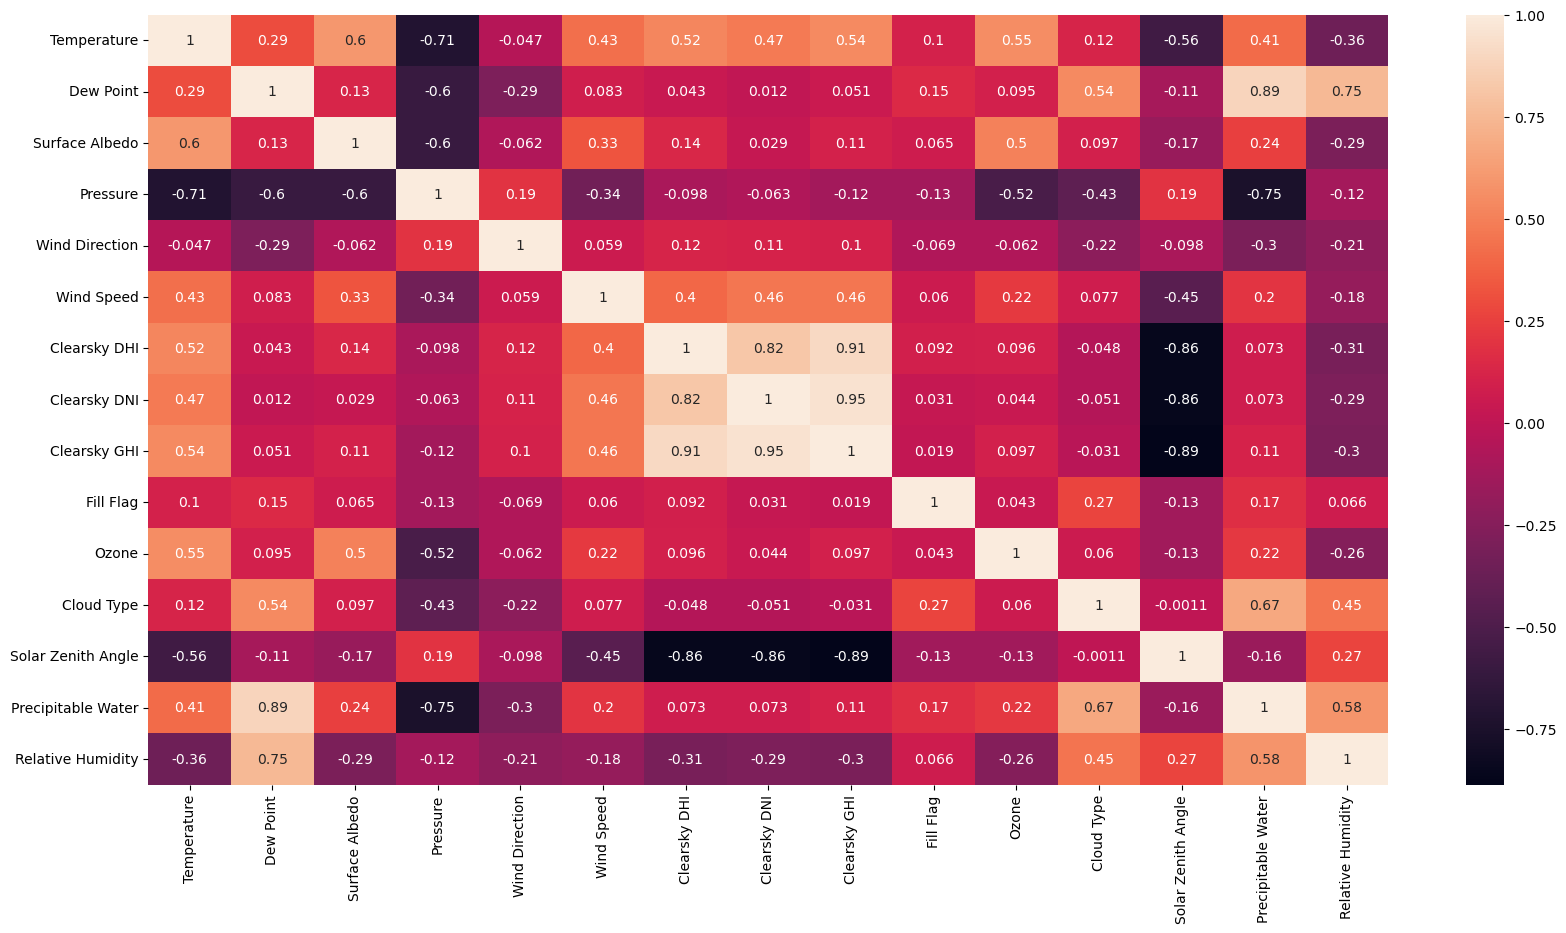

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(),annot = True)

In [10]:
for i in ('Clearsky DHI','Clearsky DNI','Clearsky GHI'):
    print(i,train[i].nunique())

Clearsky DHI 583
Clearsky DNI 990
Clearsky GHI 1044


In [11]:
train.columns

Index(['Timestamp', 'Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity'],
      dtype='object')

In [12]:
train.drop('Timestamp',axis = 1,inplace = True)

In [13]:
train.columns

Index(['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity'],
      dtype='object')

In [14]:
x = train.drop(['Clearsky DHI', 'Clearsky DNI','Clearsky GHI'],axis = 1)
y_DHI = train['Clearsky DHI']

In [15]:
y_DNI = train['Clearsky DNI']
y_GHI = train['Clearsky GHI']

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
s = StandardScaler()

In [18]:
x_std = s.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain1,xtest1,y_DHItrain,y_DHItest = train_test_split(x_std,y_DHI,test_size=0.3,random_state=0)
xtrain2,xtest2,y_DNItrain,y_DNItest = train_test_split(x_std,y_DNI,test_size=0.3,random_state=0)
xtrain3,xtest3,y_GHItrain,y_GHItest = train_test_split(x_std,y_GHI,test_size=0.3,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor()

In [23]:
from sklearn.metrics import *

In [24]:
mod_DHI = rf.fit(xtrain1,y_DHItrain)

In [25]:
mod_DNI = rf.fit(xtrain2,y_DNItrain)

In [26]:
mod_GHI = rf.fit(xtrain3,y_GHItrain)

In [27]:
ypred_DHI=mod_DHI.predict(xtest1)

In [28]:
ypred_DNI=mod_DNI.predict(xtest2)

In [29]:
ypred_GHI=mod_GHI.predict(xtest3)

In [30]:
mean_squared_error(ypred_DHI,y_DHItest),mean_squared_error(ypred_DNI,y_DNItest),mean_squared_error(ypred_GHI,y_GHItest)

(71734.97011567096, 13209.090561193554, 120.60666374302383)

In [31]:
r2_score(ypred_DHI,y_DHItest),r2_score(ypred_DNI,y_DNItest),r2_score(ypred_GHI,y_GHItest)

(0.3209029762226875, 0.8749528427704478, 0.9988582468736862)

In [32]:
test = pd.read_csv(r'C:\Users\eravrxx\Downloads\Coding\Python\python-Datasets\test (2).csv')

In [33]:
test.head()

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2023-01-01 00:00:00,11.3,1.6,0.21,1006,305,1.2,NaN,NaN,NaN,0,0.255,0,173.92,1.4,51.38
1,2023-01-01 00:10:00,11.2,1.6,0.21,1006,306,1.2,NaN,NaN,NaN,0,0.255,0,171.79,1.4,51.72
2,2023-01-01 00:20:00,11.1,1.6,0.21,1006,306,1.2,NaN,NaN,NaN,0,0.255,0,169.59,1.4,52.06
3,2023-01-01 00:30:00,11.0,1.6,0.21,1006,307,1.2,NaN,NaN,NaN,0,0.255,0,167.37,1.4,52.41
4,2023-01-01 00:40:00,10.9,1.2,0.21,1006,307,1.2,NaN,NaN,NaN,0,0.255,0,165.13,1.4,51.34


In [34]:
test = test.drop(['Timestamp','Clearsky DHI', 'Clearsky DNI','Clearsky GHI'],axis = 1)

In [35]:
test = s.fit_transform(test)

In [36]:
pred_DHI = mod_DHI.predict(test)

In [37]:
pred_DNI = mod_DNI.predict(test)

In [38]:
pred_GHI = mod_GHI.predict(test)

In [39]:
pred_DHI

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
pred_DNI

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
pred_GHI

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
numpy.unique(pred_DHI)

array([   0.  ,    1.38,    1.43, ..., 1019.54, 1019.57, 1019.61])

In [43]:
!pip install pycaret

In [2]:
from pycaret.regression import *

SyntaxError: invalid syntax (3763112614.py, line 2)

In [4]:
data = pd.read_csv(r'C:\Users\eravrxx\Downloads\Coding\Python\python-Datasets\train (24).csv')

In [46]:
data1 = data.drop(['Timestamp','Clearsky DNI','Clearsky GHI'],axis = 1)

In [47]:
se = setup(data1,target = 'Clearsky DHI', session_id=222)

,Description,Value
0,Session id,222
1,Target,Clearsky DHI
2,Target type,Regression
3,Original data shape,"(210240, 13)"
4,Transformed data shape,"(210240, 13)"
5,Transformed train set shape,"(147168, 13)"
6,Transformed test set shape,"(63072, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [48]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.5334,102.7494,10.1343,0.9929,0.0816,0.0729,7.3050
rf,Random Forest Regressor,5.5148,144.3076,12.0120,0.9900,0.0862,0.0815,16.0140
dt,Decision Tree Regressor,6.8522,342.6498,18.5029,0.9764,0.1223,0.1016,0.3160
xgboost,Extreme Gradient Boosting,10.0603,367.3644,19.1652,0.9747,0.5695,0.1240,3.2020
knn,K Neighbors Regressor,10.1397,476.1418,21.8183,0.9672,0.2619,0.1603,0.5790
lightgbm,Light Gradient Boosting Machine,11.5138,507.6480,22.5300,0.9650,0.2499,0.1425,0.8420
gbr,Gradient Boosting Regressor,15.5798,902.4192,30.0385,0.9378,0.7166,0.1836,5.1400
ada,AdaBoost Regressor,21.9649,1338.0075,36.5767,0.9077,1.3445,0.2389,3.1660
lar,Least Angle Regression,45.2548,3299.1242,57.4365,0.7725,2.5374,0.8869,0.0960
br,Bayesian Ridge,45.2565,3299.1328,57.4365,0.7725,2.5375,0.8870,0.1420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [8]:
import pandas as pd
from pycaret.regression import *

In [5]:
data_1 = data.drop(['Timestamp','Clearsky DNI','Clearsky GHI'],axis = 1)

In [12]:
se = setup(data_1,target = 'Clearsky DHI',session_id = 222)

AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'